In [7]:
import matplotlib.pyplot as plt
import dolfinx as dfx
import numpy as np
import scipy as sp

In [8]:
def bernstein(x,k):
    return x**k*(1-x)**(10-k)
def bernstein_derivative(x, n, k):
    return (k - n*x) * (x**(k - 1)) * (1 - x)**((n - 1) - k)

# We only consider cases for k=1,....,9 since k=0 and k=10 would breach BC
#

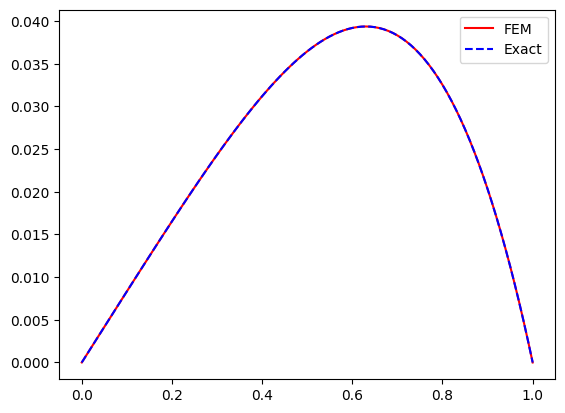

In [15]:
u_e = lambda x: -1/12*(x**4-x)
u=np.zeros(10)

x=np.linspace(0,1,101)
k=np.arange(1,10)
l=np.arange(1,10)

A = np.zeros((len(l),len(k)))
b=np.zeros((len(l),1))

n=10
p=1

for i in l:
    for j in k:
        A[i - 1, j - 1] = sp.integrate.quad(lambda x: bernstein_derivative(x, n, j) * bernstein_derivative(x, n, i),0,1)[0]
    b[i - 1] = sp.integrate.quad(lambda x: x**2 * bernstein(x, i),0,1)[0]
u = sp.linalg.solve(A, b) # Numerical approximation
u = np.transpose(u)[0] # Convert to row vector

u_fun2=0 

for i in k:
    u_fun2+=u[i-1]*bernstein(x,i)

plt.plot(x,u_fun2,'r',label = 'FEM')
plt.plot(x,u_e(x),'b--',label="Exact")
plt.legend()
plt.show()




TypeError: unsupported operand type(s) for -: 'function' and 'float'

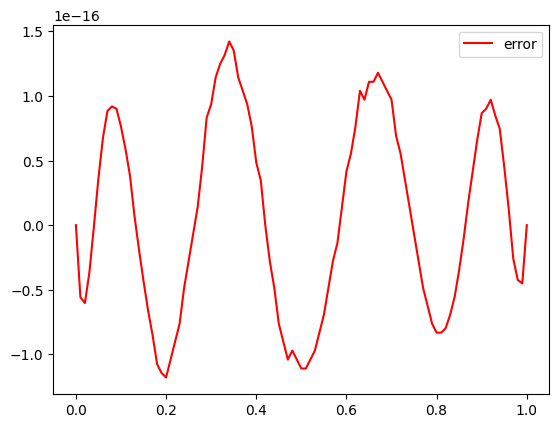

In [19]:
plt.plot(x,u_e(x)-u_fun2,'r',label = 'error')
plt.legend()

f=(u_e(x)-u_fun2)**2
I_trap = (1/200)*(f[0] + \
          2 * sum(f[1:100]) + f[100])

print(f"L_2 error is : {np.sqrt(I_trap):.2e}")
print(f"L_inf error is : {np.max(abs(u_e(x)-u_fun2)):.2e}")